### BUSINESS CONTEXT:
The Cloudera Data Science Challenge is a rigorous competition in which candidates must provide a solution to a real-world big data problem that surpasses a benchmark specified by some of the world's elite data scientists.
In the U.S., Medicare reimburses private providers for medical procedures performed for covered individuals. As such, it needs to verify that the type of procedures performed and the cost of those procedures are consistent and reasonable. Finally, it needs to detect possible errors or fraud in claims for reimbursement from providers.
##### You have been hired to analyze a large amount of data from Medicare and try to detect abnormal data -- providers, areas, or patients with unusual procedures and/or claims.
The objective of the Cloudera Data Science Challenge 2 was to uncover anomalous patients, procedures, providers, and regions in the United States government’s Medicare health insurance system.

### PROBLEM SUMMARY:
The Challenge was divided into the following three parts, each of which had specific requirements that pertained to identifying anomalous entities in different aspects of the Medicare system:

#### Part 1: Identify providers that overcharge for certain procedures or regions where procedures are too expensive.
#### Parts 1A: Highest Cost Variation
#### Parts 1B: Highest-Cost Claims by Provider
#### Parts 1C: Highest-Cost Claims by Region
#### Parts 1D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements
#### Part 2: Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions.
#### Part 2A: Providers Least Like Others 
#### Part 2B: Regions Least Like Others
#### Part 3: Identify 10,000 Medicare patients who are involved in anomalous activities.





## DATA AVAILABLE:
Completing the different parts of the Challenge required using several data sources.

#### Parts 1 and 2 were based on financial summary data from 2011 that were made available by the Centers for Medicare and Medicaid Services (CMS) in both comma-separated values (CSV) formats.

	Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv

	Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv

	Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv

	Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv

You can also find these details from the below links.
Inpatient financial summary data:

https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and- Reports/Medicare-Provider-Charge-Data/Inpatient.html

Outpatient financial summary data:

https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and- Reports/Medicare-Provider-Charge-Data/Outpatient.html

#### Part 3 of the Challenge required patient demographic information and patient-procedure transaction information

	Patient_history_samp.csv

	Review_patient_history_samp.csv

	Rreview_transaction_coo.csv

	Transaction_coo.csv Expectations from the trainees:

Trainees should able to import the data into statistical softwares and perform variety of data preprocessing, analysis, and visualization using different techniques.

[Hints:

Part-1 
##### may require performing different data manipulations and descriptive statistics to identify certain procedures or regions where procedures are too expensive. 
##### You may also use box-plots and pie-charts to visualize these analyses. 
##### Identify claimed Charges for the Three Procedures That Have the Highest Coefficient of Variation (Relative Variation).

Part-2 
##### may require performing clustering, 
##### Euclidian distances, 
##### linear regression or any other machine learning techniques to identify the three providers that are least similar to other providers 
##### and the three regions that are least similar to other regions. You may also use scatter plots to visualize.

Part-3 
##### may require performing association analysis, cluster analysis, graph presentations etc to identify Medicare patients who are involved in anomalous activities


In [1]:
# import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Understand the business problem statement.

In [2]:
# Inpatient service
# “[An] inpatient service is any service you have once you’ve been formally admitted to a hospital. 
# As either a day or overnight patient. So outpatient is anything where you’re not formally admitted to hospital.”

# Diagnosis-related group (DRG)

# APC-30 Procedure Pack

# outpatient service
# “The most common outpatient procedures are going to hospital for tests, attending an outpatient clinic, or having 
# consultation in hospital with a specialist. It’s not until you fill out all the admission paperwork and are formally 
# admitted that you change over to inpatient services.”

# In the Inpatient and Outpatient Charge Data, what is the difference between “Average Charges” and “Average Total Payments”?
# “Average Charges” refers to what the provider bills to Medicare. 
# “Average Total Payments” refers to what Medicare actually pays to the provider as well as co-payment and deductible amounts 
# that the beneficiary is responsible for and payments by third parties for coordination of benefits

#### Importing all the files.

In [3]:
Medi_Charge_DRG_FY2011=pd.read_csv("D:\\Python\\Case Study\\9. End to End Foundation Case Study-1\\9. End to End Foundation Case Study-1\\Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv")

In [4]:
Medi_Charge_DRG_FY2011.isnull().sum() #### Checking for missing values.

DRG Definition               0
Total Discharges             0
Average Covered Charges      0
Average Total Payments       0
Average Medicare Payments    0
dtype: int64

In [5]:
Medi_Charge_DRG_FY2011.head()  ####Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.06199,5762.881821,4508.202659


In [6]:
Medi_Charge_APC_CY2011=pd.read_csv("D:\\Python\\Case Study\\9. End to End Foundation Case Study-1\\9. End to End Foundation Case Study-1\\Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv")

In [7]:
Medi_Charge_APC_CY2011.isnull().sum() #### Checking for missing values.

APC                                    0
Outpatient Services                    0
Average Estimated Submitted Charges    0
Average Total Payments                 0
dtype: int64

In [8]:
Medi_Charge_APC_CY2011.head() ####Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011

,APC,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,275987,74.202956,16.147079
1,0013 - Level II Debridement & Destruction,434706,196.170070,56.133853
2,0015 - Level III Debridement & Destruction,509576,326.503444,97.156250
3,0019 - Level I Excision/ Biopsy,27860,2013.181972,330.908369
4,0020 - Level II Excision/ Biopsy,40642,3161.457873,567.156154


In [9]:
Medi_Charge_DRG100_FY2011=pd.read_csv("D:\\Python\\Case Study\\9. End to End Foundation Case Study-1\\9. End to End Foundation Case Study-1\\Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")

In [10]:
Medi_Charge_DRG100_FY2011.isnull().sum() #### Checking for missing values.

DRG Definition                                0
Provider Id                                   0
Provider Name                                 0
Provider Street Address                       0
Provider City                                 0
Provider State                                0
Provider Zip Code                             0
Hospital Referral Region (HRR) Description    0
Total Discharges                              0
Average Covered Charges                       0
Average Total Payments                        0
Average Medicare Payments                     0
dtype: int64

In [11]:
Medi_Charge_DRG100_FY2011.head(2) ###Medicare_Provider_Charge_Inpatient_DRG100_FY2011

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286


In [12]:
Medi_Provider_APC30_CY2011=pd.read_csv("D:\\Python\\Case Study\\9. End to End Foundation Case Study-1\\9. End to End Foundation Case Study-1\\Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv")

In [13]:
Medi_Provider_APC30_CY2011.isnull().sum() #### Checking for missing values.

APC                                           0
Provider Id                                   0
Provider Name                                 0
Provider Street Address                       0
Provider City                                 0
Provider State                                0
Provider Zip Code                             0
Hospital Referral Region (HRR) Description    0
Outpatient Services                           0
Average  Estimated Submitted Charges          0
Average Total Payments                        0
dtype: int64

In [14]:
Medi_Provider_APC30_CY2011.head(2) ###Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853


In [15]:
Patient_history_samp=pd.read_csv("D:\\Python\\Case Study\\9. End to End Foundation Case Study-1\\9. End to End Foundation Case Study-1\\Patient_history_samp.csv")

In [16]:
Patient_history_samp.head(2) ###Patient_history_samp

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+


In [17]:
Review_patient_history_samp=pd.read_csv("D:\\Python\\Case Study\\9. End to End Foundation Case Study-1\\9. End to End Foundation Case Study-1\\Review_patient_history_samp.csv")

In [18]:
Review_patient_history_samp.head()  ###Review_patient_history_samp

,id,age,gender,income
0,381693273,65-74,F,24000-31999
1,444060924,65-74,M,24000-31999
2,3641691,65-74,F,24000-31999
3,672653795,65-74,M,48000+
4,144916176,<65,F,48000+


In [19]:
Rreview_transaction_coo=pd.read_csv("D:\\Python\\Case Study\\9. End to End Foundation Case Study-1\\9. End to End Foundation Case Study-1\\Rreview_transaction_coo.csv")

In [20]:
Rreview_transaction_coo.head(3) ###Rreview_transaction_coo

,id,global_proc_id,count
0,65822,109,1
1,65822,125,1
2,119695,70,1


In [21]:
Transaction_coo=pd.read_csv("D:\\Python\\Case Study\\9. End to End Foundation Case Study-1\\9. End to End Foundation Case Study-1\\Transaction_coo.csv")

In [174]:
Transaction_coo.head(3) ###Transaction_coo

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1


### Part 1: Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

##### Part 1A: Highest Cost Variation
##### Parts 1B: Highest-Cost Claims by Provider 
##### Parts 1C: Highest-Cost Claims by Region
##### Part 1D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements


In [23]:
### According to question dataset required in this case-

Medi_Charge_DRG_FY2011.head()  ####Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011
Medi_Charge_APC_CY2011.head() ####Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011s
Medi_Charge_DRG100_FY2011.head() ###Medicare_Provider_Charge_Inpatient_DRG100_FY2011
Medi_Provider_APC30_CY2011.head() ###Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [24]:
##Checking the size of different data-set.
print("Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011-   Size--"+str(Medi_Charge_DRG_FY2011.shape))
print("Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011-   Size--"+str(Medi_Charge_APC_CY2011.shape))
print("Medicare_Provider_Charge_Inpatient_DRG100_FY2011-   Size--"+str(Medi_Charge_DRG100_FY2011.shape))
print("Medicare_Provider_Charge_Outpatient_APC30_CY2011-   Size--"+str(Medi_Provider_APC30_CY2011.shape))

Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011-   Size--(100, 5)
Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011-   Size--(30, 4)
Medicare_Provider_Charge_Inpatient_DRG100_FY2011-   Size--(163065, 12)
Medicare_Provider_Charge_Outpatient_APC30_CY2011-   Size--(43372, 11)


### <a>PART1A - Highest Cost Variation

##### Lets calculate the (Coefficient of variation) C.V=Std. Deviation/Mean within the table-- Medicare_Provider_Charge_Inpatient_DRG100_FY2011

In [25]:
### Determining the means and std. Deviation of the table-
Medi_Charge_DRG100_FY2011['Average Covered Charges'].agg(['mean','std'])

mean    36133.958434
std     35065.365905
Name: Average Covered Charges, dtype: float64

In [26]:
### Determining the Coefficient of variation of the table-
Coeff_variation=Medi_Charge_DRG100_FY2011['Average Covered Charges'].std()/Medi_Charge_DRG100_FY2011['Average Covered Charges'].mean()
print('coefficient of variation- '+ str(Coeff_variation))
print('% coefficient of variation- '+ str((Coeff_variation*100).round(2)) +" %")

coefficient of variation- 0.9704269176282816
% coefficient of variation- 97.04 %


In [27]:
# The coefficient of variation (CV) is a measure of relative variability. 
# It is the ratio of the standard deviation to the mean (average). 

# The CV is particularly useful when you want to compare results from two different surveys or tests
# that have different measures or values. For example, if you are comparing the results from two tests 
# that have different scoring mechanisms. If sample A has a CV of 12% and sample B has a CV of 25%, you 
# would say that sample B has more variation, relative to its mean.

In [28]:
a=Medi_Charge_DRG100_FY2011[['DRG Definition','Average Covered Charges']].groupby(['DRG Definition']).std()
a.head(5) ###Standard Deviation of  DRG process 

,Average Covered Charges
DRG Definition,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,15941.252060
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,14085.285662
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,29593.224554
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,16732.402730
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,12606.452651


In [29]:
b= Medi_Charge_DRG100_FY2011[['DRG Definition','Average Covered Charges']].groupby(['DRG Definition']).mean()
b.head(5) ###Mean of DRG process.

,Average Covered Charges
DRG Definition,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30481.989332
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,24307.762697
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,48552.613451
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,29492.125031
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,23592.928898


In [30]:
c=a['Average Covered Charges']/b['Average Covered Charges']
Medicare_Inpatient_Variation=c.copy()
c.head() ###Cofficient of variation the DRG process.

DRG Definition
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                           0.522973
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC                0.579456
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC         0.609508
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC          0.567352
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC    0.534332
Name: Average Covered Charges, dtype: float64

In [31]:
Medicare_Inpatient_Variation.nlargest(5).reset_index() ###Top 5 by highest cost variations.

### Highest cost variations is in the DRG--- 885 - PSYCHOSES.

,DRG Definition,Average Covered Charges
0,885 - PSYCHOSES,0.717796
1,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,0.633967
2,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,0.613150
3,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,0.610374
4,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,0.610107


{'whiskers': [<matplotlib.lines.Line2D at 0xd0ab510>,
 'caps': [<matplotlib.lines.Line2D at 0xd0abb10>,
 'boxes': [<matplotlib.lines.Line2D at 0xd0ab650>],
 'medians': [<matplotlib.lines.Line2D at 0xd0c32b0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd0c34d0>],
 'means': []}

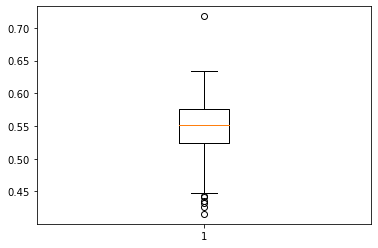

In [32]:
plt.boxplot(Medicare_Inpatient_Variation) ###Box plot for showing the cost variation.

#### Lets calculate the (Coefficient of variation) C.V=Std. Deviation/Mean within the table --Medicare_Provider_Charge_Outpatient_APC30_CY2011

In [33]:
### Determining the means and std. Deviation of the table-
Medi_Provider_APC30_CY2011['Average  Estimated Submitted Charges'].agg(['mean','std'])

mean    1473.994047
std     1837.530791
Name: Average  Estimated Submitted Charges, dtype: float64

In [34]:
### Determining the Coefficient of variation of the table-
Coeff_variation_1=Medi_Provider_APC30_CY2011['Average  Estimated Submitted Charges'].std()/Medi_Provider_APC30_CY2011['Average  Estimated Submitted Charges'].mean()
print('coefficient of variation- '+ str(Coeff_variation_1))
print('% coefficient of variation- '+ str((Coeff_variation_1*100).round(2)) +" %")

coefficient of variation- 1.2466337938779817
% coefficient of variation- 124.66 %


In [35]:
a1=Medi_Provider_APC30_CY2011[['APC','Average  Estimated Submitted Charges']].groupby(['APC']).std()
a1.head(5) ###Standard Deviation of APC process 

,Average Estimated Submitted Charges
APC,
0012 - Level I Debridement & Destruction,95.646537
0013 - Level II Debridement & Destruction,255.987420
0015 - Level III Debridement & Destruction,240.708776
0019 - Level I Excision/ Biopsy,2785.011224
0020 - Level II Excision/ Biopsy,2524.137505


In [36]:
b1= Medi_Provider_APC30_CY2011[['APC','Average  Estimated Submitted Charges']].groupby(['APC']).mean()
b1.head(5) ###Mean of  DRG process.

,Average Estimated Submitted Charges
APC,
0012 - Level I Debridement & Destruction,91.084383
0013 - Level II Debridement & Destruction,262.557685
0015 - Level III Debridement & Destruction,362.121980
0019 - Level I Excision/ Biopsy,2264.425957
0020 - Level II Excision/ Biopsy,3430.854940


In [37]:
c1=a1['Average  Estimated Submitted Charges']/b1['Average  Estimated Submitted Charges']
Medicare_Outpatient_Variation=c1.copy()
c1.head() ###Cofficient of variation the DRG process.

APC
0012 - Level I Debridement & Destruction      1.050087
0013 - Level II Debridement & Destruction     0.974976
0015 - Level III Debridement & Destruction    0.664717
0019 - Level I Excision/ Biopsy               1.229897
0020 - Level II Excision/ Biopsy              0.735717
Name: Average  Estimated Submitted Charges, dtype: float64

In [38]:
Medicare_Outpatient_Variation.nlargest(5).reset_index() ###Top 5 by highest cost variations.

### Highest cost variations is in the APC--- 0604 - Level 1 Hospital Clinic Visits .

,APC,Average Estimated Submitted Charges
0,0604 - Level 1 Hospital Clinic Visits,1.385150
1,0698 - Level II Eye Tests & Treatments,1.310444
2,0019 - Level I Excision/ Biopsy,1.229897
3,0692 - Level II Electronic Analysis of Devices,1.128166
4,0012 - Level I Debridement & Destruction,1.050087


{'whiskers': [<matplotlib.lines.Line2D at 0xd12b0b0>,
 'caps': [<matplotlib.lines.Line2D at 0xd12b5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xd121d50>],
 'medians': [<matplotlib.lines.Line2D at 0xd12baf0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd12bd10>],
 'means': []}

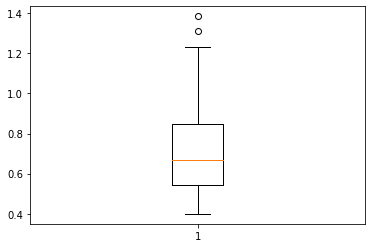

In [39]:
plt.boxplot(Medicare_Outpatient_Variation) ###Box plot for showing the cost variation.

### <a>Parts 1B: Highest-Cost Claims by Provider 

#### Lets calculate the highest cost claims by Provider within the table-- Medicare_Provider_Charge_Inpatient_DRG100_FY2011

In [40]:
### Process-
## Finding the highest covered Charges of each DRG test.
## Finding these highest cost claimed by provider.

In [41]:
Medi_Charge_DRG100_FY2011.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286


In [42]:
#Finding the maximum of Average Covered Charges in Medi_Charge_DRG100_FY2011 table.
Maximum_cover_In = Medi_Charge_DRG100_FY2011[['DRG Definition', 'Average Covered Charges']].groupby(['DRG Definition']).max().add_prefix('Maximum_').reset_index()
Maximum_cover_In=Maximum_cover_In.copy()
Maximum_cover_In.head() ### Showing the maximum average covered Charges of each DRG test.

,DRG Definition,Maximum_Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,146892.0000
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,148128.4375
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,234912.7000
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,162922.5000
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,117831.1429


In [43]:
#Joining the max value with Medi_Charge_DRG100_FY2011 table for comparing it with Average Covered Charges.
Medicharge_DRG100_IN = Medi_Charge_DRG100_FY2011.merge(Maximum_cover_In,on='DRG Definition', how='left')
Medicharge_DRG100_IN.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Maximum_Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,146892.0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,146892.0


In [44]:
##Creating a new colunm for getting the how many times the Provider claimed max Average Covered Charges.
Medicharge_DRG100_IN['Max_Avg_In']=np.where((Medicharge_DRG100_IN['Average Covered Charges']<Medicharge_DRG100_IN['Maximum_Average Covered Charges']),
                                            0,1)

In [45]:
##Creating a new column for getting the sum of the Provider claimed max Average Covered Charges and Provider Average Covered Charges
Medicharge_DRG100_IN['Tot_Amt_Max_Avg_In']=np.where((Medicharge_DRG100_IN['Average Covered Charges']<Medicharge_DRG100_IN['Maximum_Average Covered Charges']),
                                            0,(Medicharge_DRG100_IN['Maximum_Average Covered Charges']-Medicharge_DRG100_IN['Average Covered Charges']).sum().round(2))

In [46]:
Medicharge_DRG100_IN.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Maximum_Average Covered Charges,Max_Avg_In,Tot_Amt_Max_Avg_In
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,146892.0,0,0.0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,146892.0,0,0.0


In [47]:
#Getting the number of times a provider has charge max value for procedure.
Medicare_PROVIDER=Medicharge_DRG100_IN[['Provider Name','Max_Avg_In']].groupby(['Provider Name']).sum().sort_values(['Max_Avg_In'], ascending=False)

In [48]:
#Getting the amount charge above the max value for procedure.
Medicare_PROVIDER_1=Medicharge_DRG100_IN[['Provider Name','Tot_Amt_Max_Avg_In']].groupby(['Provider Name']).sum().sort_values(['Tot_Amt_Max_Avg_In'], ascending=False)

In [49]:
Medicare_PROVIDER['Max_Avg_In'].head(5).reset_index() ## Top 5 highly charged Provider by no. of times.


,Provider Name,Max_Avg_In
0,BAYONNE HOSPITAL CENTER,23
1,CROZER CHESTER MEDICAL CENTER,11
2,STANFORD HOSPITAL,10
3,HAHNEMANN UNIVERSITY HOSPITAL,7
4,DOCTORS MEDICAL CENTER,5


In [50]:
Medicare_PROVIDER_1['Tot_Amt_Max_Avg_In'].head(5).reset_index() ## Top 5 highly charged Provider by amount.


,Provider Name,Tot_Amt_Max_Avg_In
0,BAYONNE HOSPITAL CENTER,4.967923e+11
1,CROZER CHESTER MEDICAL CENTER,2.375963e+11
2,STANFORD HOSPITAL,2.159966e+11
3,HAHNEMANN UNIVERSITY HOSPITAL,1.511977e+11
4,DOCTORS MEDICAL CENTER,1.079983e+11


***Presenting above computed highly charged Provider on Pie Chart***-

In [51]:
### Data prepartion for Pie Chart.
Medicare_PROVIDER_11=Medicare_PROVIDER_1.reset_index()
Medicare_PROVIDER_11['Vis_Pie_Chart']=np.where((Medicare_PROVIDER_11['Tot_Amt_Max_Avg_In'].isin(Medicare_PROVIDER_11['Tot_Amt_Max_Avg_In'].head(10))),
                                              Medicare_PROVIDER_11['Provider Name'],'OTHER')
##Other--- are all the less than Tot_Amt_Max_Avg_In rank 10 by the Provider Name.
For_Pie_chart= Medicare_PROVIDER_11.groupby('Vis_Pie_Chart').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0D1692B0>],
      dtype=object)

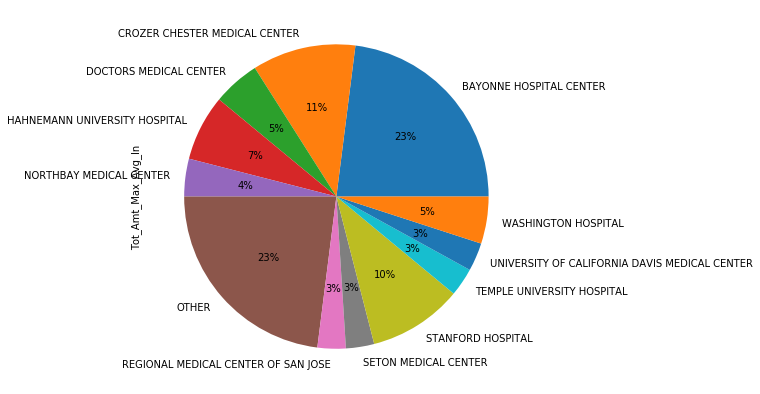

In [52]:
For_Pie_chart.plot(kind='pie',
            figsize=(15,7), 
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10,legend=False, 
            subplots=True)

In [53]:
## Top 5 provider by highly cost claimer-
## Provider Name	             Tot_Amt_Max_Avg_In
# BAYONNE HOSPITAL CENTER	        4.967923e+11
# CROZER CHESTER MEDICAL CENTER	    2.375963e+11
# STANFORD HOSPITAL	                2.159966e+11
# HAHNEMANN UNIVERSITY HOSPITAL	    1.511977e+11
# DOCTORS MEDICAL CENTER	        1.079983e+11

#### Lets calculate the highest cost claims by Provider within the table-- Medicare_Provider_Charge_Outpatient_APC30_CY2011

In [54]:
### Process-
## Finding the highest covered Charges of each APC test.
## Finding these highest cost claimed by provider.

In [55]:
Medi_Provider_APC30_CY2011.head(2)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853


In [56]:
#Finding the maximum of Average Estimated Submitted Charges in Medicare_Provider_Charge_Outpatient_APC30_CY2011 table.
Maximum_cover_Out = Medi_Provider_APC30_CY2011[['APC', 'Average  Estimated Submitted Charges']].groupby(['APC']).max().add_prefix('Maximum_').reset_index()
Maximum_cover_Out=Maximum_cover_Out.copy()
Maximum_cover_Out.head()  ### Showing the Maximum_Average Estimated Submitted Charges of each APC test.

,APC,Maximum_Average Estimated Submitted Charges
0,0012 - Level I Debridement & Destruction,841.90000
1,0013 - Level II Debridement & Destruction,5231.00000
2,0015 - Level III Debridement & Destruction,3080.84963
3,0019 - Level I Excision/ Biopsy,26466.64500
4,0020 - Level II Excision/ Biopsy,19018.40882


In [57]:
#Joining the max value with Medi_Provider_APC30_CY2011 table for comparing it with Maximum_Average Estimated Submitted Charges.
Medicharge_APC30_Out = Medi_Provider_APC30_CY2011.merge(Maximum_cover_Out,on='APC', how='left')
Medicharge_APC30_Out.head(2)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,Maximum_Average Estimated Submitted Charges
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435,841.9
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853,841.9


In [58]:
##Creating a new colunm for getting the how many times the Provider claimed Maximum_Average Estimated Submitted Charges.
Medicharge_APC30_Out['Max_Avg_Out']=np.where((Medicharge_APC30_Out['Average  Estimated Submitted Charges']<Medicharge_APC30_Out['Maximum_Average  Estimated Submitted Charges']),
                                            0,1)

In [59]:
##Creating a new column for getting the sum of the Provider claimed claimed Maximum_Average Estimated Submitted Charges and Average Estimated Submitted Charges.
Medicharge_APC30_Out['Tot_Amt_Max_Avg_Out']=np.where((Medicharge_APC30_Out['Average  Estimated Submitted Charges']<Medicharge_APC30_Out['Maximum_Average  Estimated Submitted Charges']),
                                            0,(Medicharge_APC30_Out['Maximum_Average  Estimated Submitted Charges']-Medicharge_APC30_Out['Average  Estimated Submitted Charges']).sum().round(2))

In [60]:
Medicharge_APC30_Out.head(2)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,Maximum_Average Estimated Submitted Charges,Max_Avg_Out,Tot_Amt_Max_Avg_Out
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435,841.9,0,0.0
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853,841.9,0,0.0


In [61]:
#Getting the number of times a provider has charge max value for procedure.
Medicare_PROV=Medicharge_APC30_Out[['Provider Name','Max_Avg_Out']].groupby(['Provider Name']).sum().sort_values(['Max_Avg_Out'], ascending=False)

In [62]:
#Getting the amount charge above the max value for procedure.
Medicare_PROV_1=Medicharge_APC30_Out[['Provider Name','Tot_Amt_Max_Avg_Out']].groupby(['Provider Name']).sum().sort_values(['Tot_Amt_Max_Avg_Out'], ascending=False)

In [63]:
Medicare_PROV['Max_Avg_Out'].head(5).reset_index() ## Top 5 highly charged Provider by no. of times.


,Provider Name,Max_Avg_Out
0,COLUMBIA HOSPITAL,2
1,FORT WALTON BEACH MEDICAL CENTER,2
2,CAPITAL HEALTH MEDICAL CENTER - HOPEWELL,2
3,FAIRVIEW DEVELOPMENTAL CENTER,1
4,BEVERLY HOSPITAL CORPORATION,1


In [64]:
Medicare_PROV_1['Tot_Amt_Max_Avg_Out'].head(5).reset_index() ## Top 5 highly charged Provider by amount.

## Top 5 highly charged Provider by amount.

,Provider Name,Tot_Amt_Max_Avg_Out
0,COLUMBIA HOSPITAL,6.490457e+08
1,FORT WALTON BEACH MEDICAL CENTER,6.490457e+08
2,CAPITAL HEALTH MEDICAL CENTER - HOPEWELL,6.490457e+08
3,FAIRVIEW DEVELOPMENTAL CENTER,3.245229e+08
4,BEVERLY HOSPITAL CORPORATION,3.245229e+08


### <a>Parts 1C: Highest-Cost Claims by Region

#### Lets calculate the highest cost claims by Region within the table-- Medicare_Provider_Charge_Inpatient_DRG100_FY2011

In [65]:
### Process-
## Already evaluated the highest covered Charges of each DRG test--Using the above data.
## Finding these highest cost claimed by region.

In [66]:
Medicharge_DRG100_IN.head(2) ### Using previously computed data.

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Maximum_Average Covered Charges,Max_Avg_In,Tot_Amt_Max_Avg_In
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,146892.0,0,0.0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,146892.0,0,0.0


In [67]:
#Getting the number of times a Region has charge max value for procedure.
Medicare_PROVIDER_Region=Medicharge_DRG100_IN[['Hospital Referral Region (HRR) Description','Max_Avg_In']].groupby(['Hospital Referral Region (HRR) Description']).sum().sort_values(['Max_Avg_In'], ascending=False)

In [68]:
#Getting the amount charge above the max value for procedure.
Medicare_PROVIDER_1_Region=Medicharge_DRG100_IN[['Hospital Referral Region (HRR) Description','Tot_Amt_Max_Avg_In']].groupby(['Hospital Referral Region (HRR) Description']).sum().sort_values(['Tot_Amt_Max_Avg_In'], ascending=False)

In [69]:
Medicare_PROVIDER_Region['Max_Avg_In'].head(5).reset_index() ## Top 5 highly charged Provider by no. of times.


,Hospital Referral Region (HRR) Description,Max_Avg_In
0,NJ - Newark,25
1,PA - Philadelphia,23
2,CA - San Mateo County,13
3,CA - Contra Costa County,6
4,CA - Alameda County,5


In [70]:
Medicare_PROVIDER_1_Region['Tot_Amt_Max_Avg_In'].head(5).reset_index() ## Top 5 highly charged Provider by amount.


,Hospital Referral Region (HRR) Description,Tot_Amt_Max_Avg_In
0,NJ - Newark,5.399916e+11
1,PA - Philadelphia,4.967923e+11
2,CA - San Mateo County,2.807956e+11
3,CA - Contra Costa County,1.295980e+11
4,CA - Alameda County,1.079983e+11


#### Presenting above computed highly charged Region on Pie Chart-

In [71]:
### Data prepartion for Pie Chart.
Medicare_PROVIDER_11_Region=Medicare_PROVIDER_1_Region.reset_index()
Medicare_PROVIDER_11_Region['Vis_Pie_Chart_']=np.where((Medicare_PROVIDER_11_Region['Tot_Amt_Max_Avg_In'].isin(Medicare_PROVIDER_11_Region['Tot_Amt_Max_Avg_In'].head(10))),
                                              Medicare_PROVIDER_11_Region['Hospital Referral Region (HRR) Description'],'OTHER')
##Other--- are all the less than Tot_Amt_Max_Avg_In 10 by rank of the Region Name.
For_Pie_chart_= Medicare_PROVIDER_11_Region.groupby('Vis_Pie_Chart_').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0D140270>],
      dtype=object)

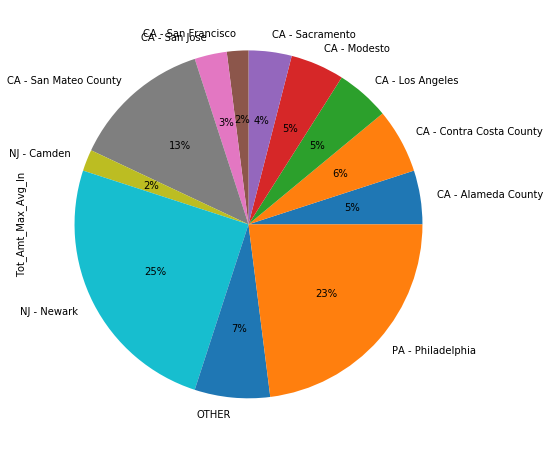

In [72]:
For_Pie_chart_.plot(kind='pie',
            figsize=(8,8), 
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10,legend=False, 
            subplots=True)

In [73]:
# ## Top 5 Region by highly cost claimer-
# Hospital Referral Region (HRR) Description	    Tot_Amt_Max_Avg_In
# NJ - Newark	                                      5.399916e+11
# PA - Philadelphia	                                  4.967923e+11
# CA - San Mateo County	                              2.807956e+11
# 3	CA - Contra Costa County	                      1.295980e+11
# CA - Alameda County	                              1.079983e+11

#### Lets calculate the highest cost claims by Region within the table-- Medicare_Provider_Charge_Outpatient_APC30_CY2011

In [74]:
### Process-
## Already evaluated the highest covered Charges of each DRG test--Using the above data.
## Finding these highest cost claimed by region.

In [75]:
#Getting the number of times a Region has charge max value for procedure.
Medicare_PROV_Region=Medicharge_APC30_Out[['Hospital Referral Region (HRR) Description','Max_Avg_Out']].groupby(['Hospital Referral Region (HRR) Description']).sum().sort_values(['Max_Avg_Out'], ascending=False)

In [76]:
#Getting the amount charge above the max value for procedure.
Medicare_PROV_1_Region=Medicharge_APC30_Out[['Hospital Referral Region (HRR) Description','Tot_Amt_Max_Avg_Out']].groupby(['Hospital Referral Region (HRR) Description']).sum().sort_values(['Tot_Amt_Max_Avg_Out'], ascending=False)

In [77]:
Medicare_PROV_Region['Max_Avg_Out'].head(5).reset_index() ## Top 5 highly charged Region by no. of times.


,Hospital Referral Region (HRR) Description,Max_Avg_Out
0,PA - Philadelphia,5
1,CA - Los Angeles,3
2,FL - Pensacola,2
3,CA - Orange County,2
4,MA - Boston,2


In [78]:
Medicare_PROV_1_Region['Tot_Amt_Max_Avg_Out'].head(5).reset_index() ## Top 5 highly charged Region by amount.

## Top 5 highly charged Region by amount.

,Hospital Referral Region (HRR) Description,Tot_Amt_Max_Avg_Out
0,PA - Philadelphia,1.622614e+09
1,CA - Los Angeles,9.735686e+08
2,FL - Pensacola,6.490457e+08
3,CA - Orange County,6.490457e+08
4,MA - Boston,6.490457e+08


### <a>Parts 1D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements

In [79]:
## Average Covered Charges as Claims
## Average Total Payments as Reimbursement

####  Using the table-- Medicare_Provider_Charge_Inpatient_DRG100_FY2011

In [80]:
Med_In_Tab=Medi_Charge_DRG100_FY2011[['DRG Definition', 'Provider Name','Average Total Payments', 'Average Covered Charges' ]]
Med_In_Tab=Med_In_Tab.copy()

In [81]:
#Difference of claim and reimbursement
Med_In_Tab['CLAIM_DIFF']=Med_In_Tab['Average Covered Charges']-Med_In_Tab['Average Total Payments']

In [82]:
Med_In_Tab.head(2)

,DRG Definition,Provider Name,Average Total Payments,Average Covered Charges,CLAIM_DIFF
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,5777.241758,32963.07692,27185.835162
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,5787.571429,15131.85714,9344.285711


In [83]:
#Finding the mean of Average Covered Charges for Inpatient_DRG by DRG Defination and Provider.
Med_In_Tab_AGG = Med_In_Tab[['DRG Definition', 'Provider Name', 'CLAIM_DIFF']].groupby(['DRG Definition', 'Provider Name']).mean().add_suffix('_avg').reset_index()

In [84]:
Med_In_Tab_AGG.head(3)

,DRG Definition,Provider Name,CLAIM_DIFF_avg
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299


In [85]:
#Finding the max for InpatientDRG DRG Definition
Med_In_Tab_MAX = Med_In_Tab_AGG[['DRG Definition', 'CLAIM_DIFF_avg']].groupby(['DRG Definition']).max().add_suffix('_max').reset_index()

In [86]:
Med_In_Tab_MAX.head(2)

,DRG Definition,CLAIM_DIFF_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,135377.61538
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,122609.00000


In [87]:
#Merging The mean and max - will give side by side comparison of region having highest claim difference
Med_In_Tab_Join = Med_In_Tab_AGG.merge(Med_In_Tab_MAX,on='DRG Definition', how='left')

In [88]:
Med_In_Tab_Join.head(2)

,DRG Definition,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671,135377.61538
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146,135377.61538


In [89]:
# New column created for further process-
Med_In_Tab_Join['Comparison']=np.where((Med_In_Tab_Join['CLAIM_DIFF_avg'])>=(Med_In_Tab_Join['CLAIM_DIFF_avg_max']),1,0)

In [90]:
Med_In_Tab_Join.head(2)

,DRG Definition,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max,Comparison
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671,135377.61538,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146,135377.61538,0


In [91]:
# New column created for further process-
Med_In_Tab_Join['Comparison_2']=np.where((Med_In_Tab_Join['CLAIM_DIFF_avg'])>=(Med_In_Tab_Join['CLAIM_DIFF_avg_max']),(Med_In_Tab_Join['CLAIM_DIFF_avg_max']),0)

In [92]:
#Getting number of times a provider has max claim diff for max procedures
Prov_Max_claim_diff = Med_In_Tab_Join[['Provider Name','Comparison']].groupby(['Provider Name']).sum().sort_values(['Comparison'], ascending=False)

In [93]:
Prov_Max_claim_diff.head() ##Provider Name-number of times a provider has max claim diff for max procedures

,Comparison
Provider Name,
BAYONNE HOSPITAL CENTER,29
CROZER CHESTER MEDICAL CENTER,12
HAHNEMANN UNIVERSITY HOSPITAL,8
WASHINGTON HOSPITAL,6
STANFORD HOSPITAL,6


In [94]:
### Data prepartion for Pie Chart.
Medic_PROV11=Prov_Max_claim_diff.reset_index()
Medic_PROV11['Vis_P_C']=np.where((Medic_PROV11['Provider Name'].isin(Medic_PROV11['Provider Name'].head(10))),
                                              Medic_PROV11['Provider Name'],'OTHER')
##Other--- are all the less than are rank 10 by the Provider Name.
For_Pie_cha= Medic_PROV11.groupby('Vis_P_C').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0D3B53D0>],
      dtype=object)

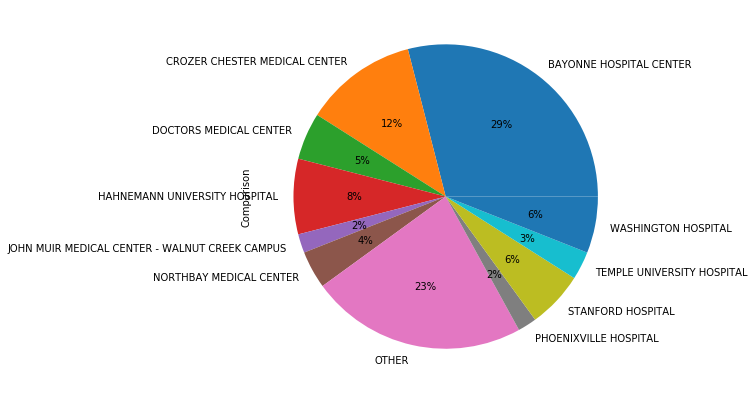

In [95]:
For_Pie_cha.plot(kind='pie',
            figsize=(15,7), 
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10,legend=False, 
            subplots=True)

#### Using the table--  Medicare_Provider_Charge_Outpatient_APC30_CY2011

In [96]:
# Average Estimated Submitted Charges as Claims
# Average Total Payments as Reimbursement

In [97]:
Medi_Provider_APC30_CY2011.head(2)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853


In [98]:
Med_Out_Tab=Medi_Provider_APC30_CY2011[['APC', 'Provider Name','Average  Estimated Submitted Charges', 'Average Total Payments' ]]
Med_Out_Tab=Med_Out_Tab.copy()

In [99]:
#Difference of claim and reimbursement
Med_Out_Tab['CLAIM_DIFF_1']=Med_Out_Tab['Average  Estimated Submitted Charges']-Med_Out_Tab['Average Total Payments']

In [100]:
Med_Out_Tab.head(2)

,APC,Provider Name,Average Estimated Submitted Charges,Average Total Payments,CLAIM_DIFF_1
0,0012 - Level I Debridement & Destruction,EAST ALABAMA MEDICAL CENTER AND SNF,78.086957,21.910435,56.176522
1,0012 - Level I Debridement & Destruction,CENTRAL PENINSULA GENERAL HOSPITAL,149.589749,36.623853,112.965895


In [101]:
#Finding the mean of Average Estimated Submitted Charges for Out_patient by APC  and Provider.
Med_Out_Tab_AGG = Med_Out_Tab[['APC', 'Provider Name', 'CLAIM_DIFF_1']].groupby(['APC', 'Provider Name']).mean().add_suffix('_avg').reset_index()

In [102]:
Med_Out_Tab_AGG.head(2)

,APC,Provider Name,CLAIM_DIFF_1_avg
0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818
1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495


In [103]:
#Finding the max for Out_patient APC
Med_Out_Tab_MAX = Med_Out_Tab_AGG[['APC', 'CLAIM_DIFF_1_avg']].groupby(['APC']).max().add_suffix('_max').reset_index()

In [104]:
Med_Out_Tab_MAX.head(2)

,APC,CLAIM_DIFF_1_avg_max
0,0012 - Level I Debridement & Destruction,827.44
1,0013 - Level II Debridement & Destruction,5175.40


In [105]:
#Merging The mean and max - will give side by side comparison of region having highest claim difference
Med_Out_Tab_Join = Med_Out_Tab_AGG.merge(Med_Out_Tab_MAX,on='APC', how='left')

In [106]:
Med_Out_Tab_Join.head(2)

,APC,Provider Name,CLAIM_DIFF_1_avg,CLAIM_DIFF_1_avg_max
0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818,827.44
1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495,827.44


In [107]:
# New column created for further process-
Med_Out_Tab_Join['Comparison']=np.where((Med_Out_Tab_Join['CLAIM_DIFF_1_avg'])>=(Med_Out_Tab_Join['CLAIM_DIFF_1_avg_max']),1,0)

In [108]:
Med_Out_Tab_Join.head(2)

,APC,Provider Name,CLAIM_DIFF_1_avg,CLAIM_DIFF_1_avg_max,Comparison
0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818,827.44,0
1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495,827.44,0


In [109]:
#Getting number of times a provider has max claim diff for max procedures
Prov_Max_claim_diff_1 = Med_Out_Tab_Join[['Provider Name','Comparison']].groupby(['Provider Name']).sum().sort_values(['Comparison'], ascending=False)

In [110]:
Prov_Max_claim_diff_1.head() ##Provider Name-number of times a provider has max claim diff for max procedures

,Comparison
Provider Name,
COLUMBIA HOSPITAL,2
FORT WALTON BEACH MEDICAL CENTER,2
CAPITAL HEALTH MEDICAL CENTER - HOPEWELL,2
FAIRVIEW DEVELOPMENTAL CENTER,1
BEVERLY HOSPITAL CORPORATION,1


### <a>Part 2: Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions.
##### Part 2A: Providers Least Like Others
##### Part 2B: Regions Least Like Others

#### <a>Part 2A: Providers Least Like Others

###### Using the table-- Medicare_Provider_Charge_Inpatient_DRG100_FY2011

In [111]:
Medi_Charge_DRG100_FY2011.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286


In [112]:
##Required attributes separated for getting provider least like-
Med_In_Pro=Medi_Charge_DRG100_FY2011[['Provider Id','Provider Name','Average Covered Charges']]

In [113]:
Med_In_Pro.head()

,Provider Id,Provider Name,Average Covered Charges
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,32963.07692
1,10005,MARSHALL MEDICAL CENTER SOUTH,15131.85714
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,37560.37500
3,10011,ST VINCENT'S EAST,13998.28000
4,10016,SHELBY BAPTIST MEDICAL CENTER,31633.27778


In [114]:
a=Med_In_Pro.groupby(['Provider Id']).mean().reset_index()
a.head(2) ###Mean value of average cover charges by each Provider Id 

,Provider Id,Average Covered Charges
0,10001,35247.032779
1,10005,16451.095600


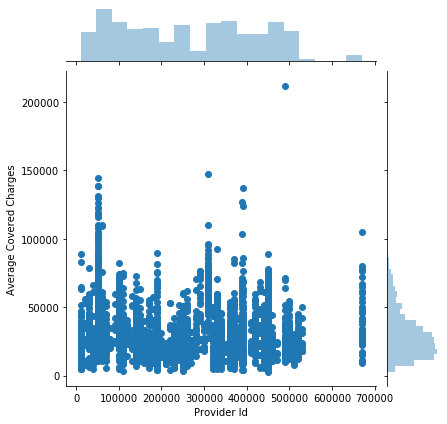

In [115]:
sns.jointplot(x='Provider Id', y='Average Covered Charges', data=a)

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
model.fit(a['Provider Id'].values.reshape(-1,1),a['Average Covered Charges'].values.reshape(-1,1)) ##Fitting the values in the model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
a['Predicted']=model.predict(a['Provider Id'].values.reshape(-1,1)) ###Predicting value on the model

##predict() : given a trained model, predict the label of a new set of data. 

a['Residual']=abs(a['Predicted']-a['Average Covered Charges']) ## New column 

In [118]:
#Details Concerning Required Providers
a.sort_values('Residual',ascending=False).head(3) ##Highest Deviated points from the regression line.
### Shows some of the point are least like others.

,Provider Id,Average Covered Charges,Predicted,Residual
3143,490142,211922.000000,27139.077206,184782.922794
1845,310025,147441.337388,30878.047679,116563.289710
401,50464,144695.837072,36266.161598,108429.675474


In [119]:
b=a.sort_values('Residual',ascending=False)
b.head(3)

,Provider Id,Average Covered Charges,Predicted,Residual
3143,490142,211922.000000,27139.077206,184782.922794
1845,310025,147441.337388,30878.047679,116563.289710
401,50464,144695.837072,36266.161598,108429.675474


In [120]:
c=Med_In_Pro.groupby(['Provider Id','Provider Name']).mean().reset_index()

d=b.merge(c[['Provider Id','Provider Name']],on='Provider Id', how='left')

In [121]:
d.head(3) ### Least like other (Analysis done on the basis of average covered Charges)-Provider Name.

,Provider Id,Average Covered Charges,Predicted,Residual,Provider Name
0,490142,211922.000000,27139.077206,184782.922794,UVA HEALTH SCIENCES CENTER
1,310025,147441.337388,30878.047679,116563.289710,BAYONNE HOSPITAL CENTER
2,50464,144695.837072,36266.161598,108429.675474,DOCTORS MEDICAL CENTER


##### Using the table--Medicare_Provider_Charge_Outpatient_APC30_CY2011

In [122]:
Medi_Provider_APC30_CY2011.head(2)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853


In [123]:
##Required attributes separated for getting provider least like-
Med_Out_Pro=Medi_Provider_APC30_CY2011[['Provider Id','Provider Name','Average  Estimated Submitted Charges']]

In [124]:
Med_Out_Pro.head(2)

,Provider Id,Provider Name,Average Estimated Submitted Charges
0,10029,EAST ALABAMA MEDICAL CENTER AND SNF,78.086957
1,20024,CENTRAL PENINSULA GENERAL HOSPITAL,149.589749


In [125]:
a_1=Med_Out_Pro.groupby(['Provider Id']).mean().reset_index()
a_1.head(2) ###Mean value of average cover charges by each Provider Id 

,Provider Id,Average Estimated Submitted Charges
0,10001,1942.914036
1,10005,903.855812


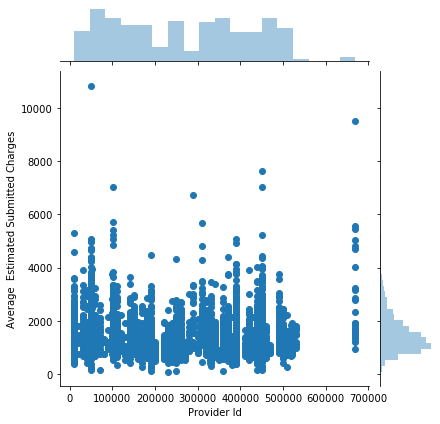

In [126]:
sns.jointplot(x='Provider Id', y='Average  Estimated Submitted Charges', data=a_1)

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
model.fit(a_1['Provider Id'].values.reshape(-1,1),a_1['Average  Estimated Submitted Charges'].values.reshape(-1,1)) ##Fitting the values in the model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
a_1['Predicted']=model.predict(a_1['Provider Id'].values.reshape(-1,1))

##predict() : given a trained model, predict the label of a new set of data. 

a_1['Residual']=abs(a_1['Predicted']-a_1['Average  Estimated Submitted Charges'])

In [129]:
#Details Concerning Required Providers

a_1.sort_values('Residual',ascending=False).head(3) ##Highest Deviated points from the regression line.

### Shows some of the point are least like others.

,Provider Id,Average Estimated Submitted Charges,Predicted,Residual
284,50205,10836.473330,1637.973664,9198.499666
3120,670029,9498.550769,1342.689001,8155.861768
2770,450683,7637.296667,1447.185616,6190.111051


In [130]:
b_1=a_1.sort_values('Residual',ascending=False)
b_1.head(3)

,Provider Id,Average Estimated Submitted Charges,Predicted,Residual
284,50205,10836.473330,1637.973664,9198.499666
3120,670029,9498.550769,1342.689001,8155.861768
2770,450683,7637.296667,1447.185616,6190.111051


In [131]:
c_1=Med_Out_Pro.groupby(['Provider Id','Provider Name']).mean().reset_index()

d_1=b_1.merge(c[['Provider Id','Provider Name']],on='Provider Id', how='left')

In [132]:
d_1.head(3) ### Least like other (Analysis done on the basis of average covered Charges)-Provider Name.

,Provider Id,Average Estimated Submitted Charges,Predicted,Residual,Provider Name
0,50205,10836.473330,1637.973664,9198.499666,EAST VALLEY HOSPITAL MEDICAL CENTER
1,670029,9498.550769,1342.689001,8155.861768,FIRST STREET HOSPITAL LP
2,450683,7637.296667,1447.185616,6190.111051,RENAISSANCE HOSPITAL TERRELL


#### <a>Part 2B: Regions Least Like Others

##### Using the table-- Medicare_Provider_Charge_Inpatient_DRG100_FY2011

In [133]:
Medi_Charge_DRG100_FY2011.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286


In [134]:
##Required attributes separated for getting provider least like-
Med_In_Pro_1=Medi_Charge_DRG100_FY2011[['Hospital Referral Region (HRR) Description','Average Covered Charges']]

In [135]:
Med_In_Pro_1.head(2)

,Hospital Referral Region (HRR) Description,Average Covered Charges
0,AL - Dothan,32963.07692
1,AL - Birmingham,15131.85714


In [136]:
aa=Med_In_Pro_1.groupby(['Hospital Referral Region (HRR) Description']).mean().reset_index()
aa['State_col']=aa.index
aa.head(2) ###Mean value of average cover charges by each Provider Id 

,Hospital Referral Region (HRR) Description,Average Covered Charges,State_col
0,AK - Anchorage,40348.747302,0
1,AL - Birmingham,35875.134989,1


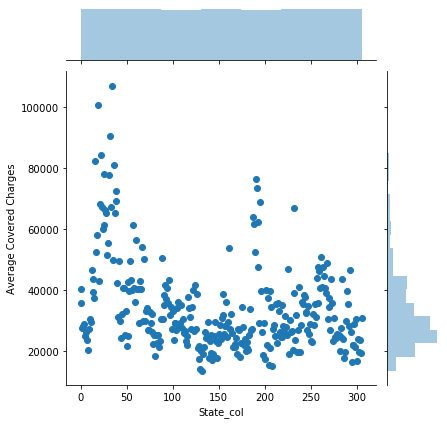

In [137]:
sns.jointplot(x='State_col', y='Average Covered Charges', data=aa)

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
model.fit(aa['State_col'].values.reshape(-1,1),aa['Average Covered Charges'].values.reshape(-1,1)) ##Fitting the values in the model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
aa['Predicted']=model.predict(aa['State_col'].values.reshape(-1,1)) ###Predicting value on the model

##predict() : given a trained model, predict the label of a new set of data. 

aa['Residual']=abs(aa['Predicted']-aa['Average Covered Charges']) ## New column 

In [140]:
#Details Concerning Required Providers
aa.sort_values('Residual',ascending=False).head(3) ##Highest Deviated points from the regression line.
### Shows some of the point are least like others.

,Hospital Referral Region (HRR) Description,Average Covered Charges,State_col,Predicted,Residual
34,CA - San Mateo County,107043.676422,34,41093.051131,65950.625290
19,CA - Contra Costa County,100597.091568,19,41946.985579,58650.105989
32,CA - San Jose,90480.155403,32,41206.909058,49273.246345


In [141]:
bb=aa.sort_values('Residual',ascending=False)
bb.head(3) ### Least like other (Analysis done on the basis of average covered Charges)-Region Name.

,Hospital Referral Region (HRR) Description,Average Covered Charges,State_col,Predicted,Residual
34,CA - San Mateo County,107043.676422,34,41093.051131,65950.625290
19,CA - Contra Costa County,100597.091568,19,41946.985579,58650.105989
32,CA - San Jose,90480.155403,32,41206.909058,49273.246345


##### Using the table--Medicare_Provider_Charge_Outpatient_APC30_CY2011

In [142]:
Medi_Provider_APC30_CY2011.head(2)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853


In [143]:
##Required attributes separated for getting provider least like-
Med_Out_Pro_1=Medi_Provider_APC30_CY2011[['Hospital Referral Region (HRR) Description','Average  Estimated Submitted Charges']]

In [144]:
Med_Out_Pro_1.head(2)

,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges
0,AL - Birmingham,78.086957
1,AK - Anchorage,149.589749


In [145]:
aa_1=Med_Out_Pro_1.groupby(['Hospital Referral Region (HRR) Description']).mean().reset_index()
aa_1['State_col']=aa_1.index
aa_1.head(2) ###Mean value of average cover charges by each Provider Id 

,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges,State_col
0,AK - Anchorage,1272.439421,0
1,AL - Birmingham,1988.589815,1


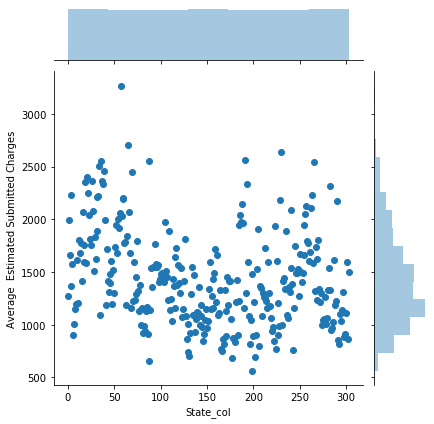

In [146]:
sns.jointplot(x='State_col', y='Average  Estimated Submitted Charges', data=aa_1)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
model.fit(aa_1['State_col'].values.reshape(-1,1),aa_1['Average  Estimated Submitted Charges'].values.reshape(-1,1)) ##Fitting the values in the model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
aa_1['Predicted']=model.predict(aa_1['State_col'].values.reshape(-1,1)) ###Predicting value on the model

##predict() : given a trained model, predict the label of a new set of data. 

aa_1['Residual']=abs(aa_1['Predicted']-aa_1['Average  Estimated Submitted Charges']) ## New column 

In [149]:
#Details Concerning Required Providers
aa_1.sort_values('Residual',ascending=False).head(3) ##Highest Deviated points from the regression line.
### Shows some of the point are least like others.

,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges,State_col,Predicted,Residual
57,FL - Hudson,3267.836694,57,1570.001127,1697.835567
230,PA - Philadelphia,2638.394517,230,1331.698713,1306.695804
265,TX - McAllen,2545.273143,265,1283.487242,1261.785901


In [150]:
bb_1=aa_1.sort_values('Residual',ascending=False)
bb_1.head(3) ### Least like other (Analysis done on the basis of average covered Charges)-Region Name.

,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges,State_col,Predicted,Residual
57,FL - Hudson,3267.836694,57,1570.001127,1697.835567
230,PA - Philadelphia,2638.394517,230,1331.698713,1306.695804
265,TX - McAllen,2545.273143,265,1283.487242,1261.785901


### <a>Part3: Identify 10000 Medicare patients who are involved in anomalous activities.

In [151]:
Patient_history_samp.shape ###Details of customers.

(500000, 4)

In [152]:
Patient_history_samp.head() ## Patient detail.

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+


In [153]:
Transaction_coo.shape # Customer transaction detail.

(1514809, 3)

In [154]:
Transaction_coo.head() ## Transcation detail

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1


In [155]:
#Fixing the null values; replacing them with mode

In [156]:
Patient_history_samp.age=Patient_history_samp.age.fillna(Patient_history_samp.age.mode()[0])
Patient_history_samp.income=Patient_history_samp.income.fillna(Patient_history_samp.income.mode()[0])

In [157]:
trans=Transaction_coo[['id','count']].groupby('id').sum()  ### Grouping the transaction details.

In [158]:
trans.head(2)

,count
id,
7561,2
7619,2


In [159]:
tr=trans.reset_index()
tr.head()

,id,count
0,7561,2
1,7619,2
2,10479,4
3,13515,2
4,15213,6


In [160]:
tr.shape

(505000, 2)

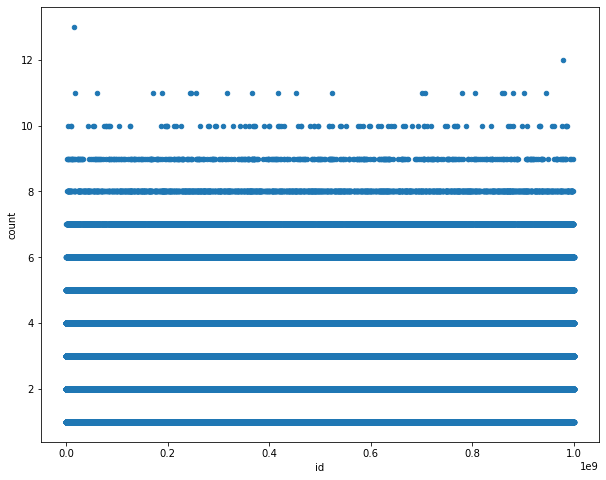

In [161]:
tr.plot(kind='scatter',x='id',y='count',figsize=(10,8))

In [162]:
tr['count'].mean() # On an average a patient is taking benifit of medicare.

2.9996217821782176

{'whiskers': [<matplotlib.lines.Line2D at 0x15773090>,
 'caps': [<matplotlib.lines.Line2D at 0x15773670>,
 'boxes': [<matplotlib.lines.Line2D at 0x15773070>],
 'medians': [<matplotlib.lines.Line2D at 0x15773b30>],
 'fliers': [<matplotlib.lines.Line2D at 0x15773df0>],
 'means': []}

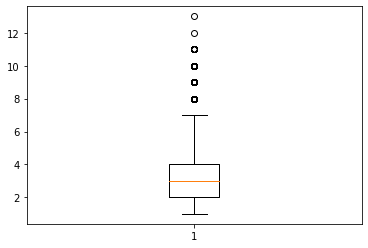

In [163]:
plt.boxplot(tr['count'])

In [164]:
Ano=tr.loc[tr['count']>7].reset_index(drop=True) ### These ones are the real outliers
Ano

,id,count
0,1552051,9
1,1661457,8
2,2385395,10
3,2462212,8
4,2488748,8
...,...,...
2299,997414065,8
2300,997607529,8
2301,997804276,8
2302,998120672,9


In [165]:
Annomalous=tr.loc[tr['count']>=6].reset_index(drop=True) ##Medicare patients who are involved in anomalous activities
Annomalous

,id,count
0,15213,6
1,137960,6
2,291344,6
3,322155,7
4,373708,6
...,...,...
26737,999905494,6
26738,999909971,6
26739,999917672,6
26740,999954783,6


In [166]:
#Combining transactional information, trans and history data set, to form "x" which will form base table

In [167]:
x=Annomalous.merge(Patient_history_samp,how='left',on='id')

In [168]:
x ##Medicare patients id' swho are involved in anomalous activities

,id,count,age,gender,income
0,15213,6,85+,M,32000-47999
1,137960,6,65-74,M,32000-47999
2,291344,6,<65,M,<16000
3,322155,7,65-74,F,48000+
4,373708,6,65-74,F,32000-47999
...,...,...,...,...,...
26737,999905494,6,65-74,M,32000-47999
26738,999909971,6,85+,F,<16000
26739,999917672,6,<65,M,<16000
26740,999954783,6,85+,F,48000+


In [169]:
x.loc[x['count']>7] ### These ones are the real outliers

,id,count,age,gender,income
32,1552051,9,85+,F,<16000
38,1661457,8,75-84,F,<16000
57,2385395,10,75-84,F,16000-23999
60,2462212,8,85+,M,16000-23999
62,2488748,8,65-74,F,<16000
...,...,...,...,...,...
26679,997414065,8,85+,F,32000-47999
26684,997607529,8,75-84,M,48000+
26687,997804276,8,75-84,M,<16000
26696,998120672,9,<65,F,32000-47999
